In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv")

In [5]:
df.shape


(57650, 4)

In [6]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [14]:
top=df["artist"].value_counts().head()
print("The top atrist are \n",top)

The top atrist are 
 artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Name: count, dtype: int64


In [15]:
df = df.sample(10000)
df = df.drop('link', axis=1).reset_index(drop=True)


In [17]:
 #✅ WordCloud for lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)


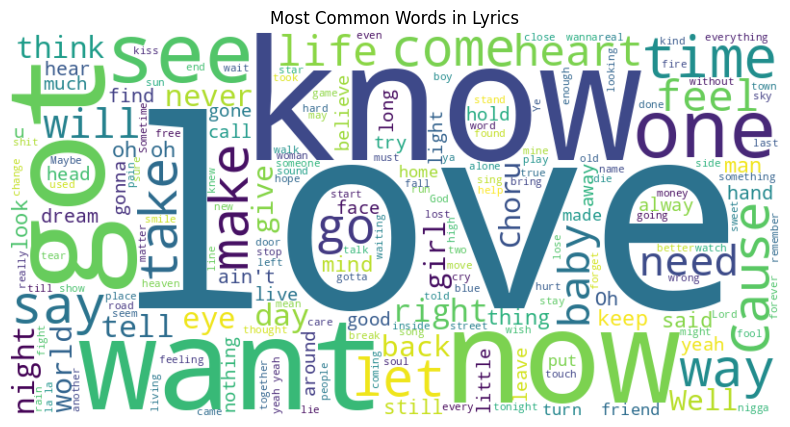

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [21]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [23]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [24]:
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]
    return df[['artist', 'song']].iloc[song_indices]


In [25]:
print("\nRecommendations for the song 'For The First Time':")
recommendations = recommend_songs("For The First Time")
print(recommendations)


Recommendations for the song 'For The First Time':
              artist                  song
432      Keith Urban  Black Leather Jacket
9345  Lynyrd Skynyrd    You Got That Right
1678     Celine Dion          At Seventeen
4007  Jennifer Lopez            Loving You
4067  Jennifer Lopez           I Need Love
